## Прогнозирование популярности новостей в соц сетяъ
 Цель состоит в том, чтобы предсказать популярность новостей, размещаемых на различных платформах социальных сетей.

Датасет: новости на фейсбуке 2016-2017 годов 

IDLink: id новости

TS1 (numeric): уровень популярности с 0-20 минут после публикации

TS2 (numeric): 20-40 минут 

и так далее

TS144 (numeric): после двух дней публикации

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [30]:
data = pd.read_csv("Facebook_Economy.csv")
data.head()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12,TS13,TS14,TS15,TS16,TS17,TS18,TS19,TS20,TS21,TS22,TS23,TS24,TS25,TS26,TS27,TS28,TS29,TS30,TS31,TS32,TS33,TS34,TS35,TS36,TS37,TS38,TS39,...,TS105,TS106,TS107,TS108,TS109,TS110,TS111,TS112,TS113,TS114,TS115,TS116,TS117,TS118,TS119,TS120,TS121,TS122,TS123,TS124,TS125,TS126,TS127,TS128,TS129,TS130,TS131,TS132,TS133,TS134,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,-1,-1,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,...,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,2,-1,-1,-1,-1,-1,-1,-1,-1,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,15,15,15,17,17,18,18,19,19,...,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,92,93,93,94,95,96,97,97,97,97,97,97,97,97,97,97,97,97,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34


In [31]:
data.shape

(29928, 145)

In [32]:
print(data.isnull().any())

IDLink    False
TS1       False
TS2       False
TS3       False
TS4       False
          ...  
TS140     False
TS141     False
TS142     False
TS143     False
TS144     False
Length: 145, dtype: bool


In [33]:
data.describe()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12,TS13,TS14,TS15,TS16,TS17,TS18,TS19,TS20,TS21,TS22,TS23,TS24,TS25,TS26,TS27,TS28,TS29,TS30,TS31,TS32,TS33,TS34,TS35,TS36,TS37,TS38,TS39,...,TS105,TS106,TS107,TS108,TS109,TS110,TS111,TS112,TS113,TS114,TS115,TS116,TS117,TS118,TS119,TS120,TS121,TS122,TS123,TS124,TS125,TS126,TS127,TS128,TS129,TS130,TS131,TS132,TS133,TS134,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
count,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,...,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.00000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000
mean,27579.985532,-0.420710,0.019814,2.061080,2.586240,2.994988,3.285251,3.813085,4.345295,4.701751,5.244219,5.718524,6.113740,6.644313,7.120356,7.425287,7.930500,8.337176,8.724873,9.290230,9.704090,10.112303,10.659449,11.084169,11.531342,12.108794,12.538827,12.964448,13.503375,13.899459,14.411454,15.015504,15.442195,16.075916,16.650528,17.196338,17.610933,18.250902,18.621224,19.101510,...,40.255045,40.426758,40.603883,40.722868,40.951584,41.140136,41.285385,41.413025,41.533614,41.689822,41.829157,41.969661,42.082565,42.172046,42.316927,42.446171,42.565257,42.702453,42.799987,42.938352,43.086140,43.155373,43.303595,43.386828,43.535552,43.628341,43.79865,43.906476,44.016807,44.113639,44.256750,44.341687,44.512597,44.618818,44.717221,44.804431,44.888466,45.117482,45.233995,45.335739
std,16591.086104,13.396052,17.077407,282.216546,282.299425,282.506177,282.603609,282.842387,284.130729,284.520470,284.819347,285.547707,286.011261,286.602850,287.480304,287.676430,288.631378,289.171200,289.825621,290.487683,290.989454,291.538555,292.459557,293.290026,294.166981,294.935026,295.809090,296.610547,297.574781,297.852348,298.371901,300.413358,300.766638,302.759076,303.498906,304.613206,305.124248,306.291650,306.558063,307.319151,...,386.921533,387.289714,387.990473,388.457790,390.270520,392.783508,393.747897,394.203403,394.561086,395.411917,396.135675,396.586289,396.965292,397.244825,397.835597,398.169797,398.903087,399.313010,399.513792,399.949311,400.503772,400.604721,401.520369,401.672667,402.177593,402.351309,404.77497,405.126175,405.476890,405.644232,406.520808,406.684954,407.876993,408.702349,409.022775,409.363348,409.733246,411.139678,411.472159,411.823251
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,13370.250000,-1.000000,-

Обучаем модель

In [34]:
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split

In [35]:
final_data = data
final_data = (final_data - final_data.min()) / (final_data.max() - final_data.min())
Y = np.array(final_data['IDLink'])
X = np.array(final_data.drop(['IDLink'],axis=1))

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(37,input_shape=(xtrain[0].shape), activation=tf.nn.tanh,  kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

In [38]:
model.compile(optimizer= 'adam' , loss= keras.losses.MeanSquaredError(), metrics=['mae'])

In [39]:
history=model.fit(xtrain,ytrain,epochs=10,verbose=2)

Epoch 1/10
749/749 - 1s - loss: 0.1313 - mae: 0.2516
Epoch 2/10
749/749 - 1s - loss: 0.0813 - mae: 0.2465
Epoch 3/10
749/749 - 1s - loss: 0.0821 - mae: 0.2467
Epoch 4/10
749/749 - 1s - loss: 0.0817 - mae: 0.2469
Epoch 5/10
749/749 - 1s - loss: 0.0812 - mae: 0.2465
Epoch 6/10
749/749 - 1s - loss: 0.0812 - mae: 0.2465
Epoch 7/10
749/749 - 1s - loss: 0.0812 - mae: 0.2465
Epoch 8/10
749/749 - 1s - loss: 0.0812 - mae: 0.2464
Epoch 9/10
749/749 - 1s - loss: 0.0812 - mae: 0.2465
Epoch 10/10
749/749 - 1s - loss: 0.0814 - mae: 0.2465


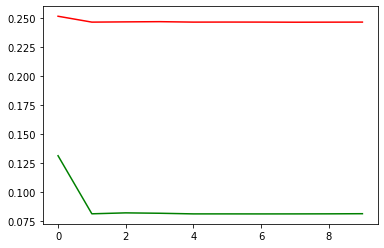

In [40]:
plt.plot(history.epoch,history.history['loss'],'g')
plt.plot(history.epoch,history.history['mae'],'r')

## Тест модель

In [41]:
model.evaluate(xtest,ytest)

188/188 [==============================] - 0s 768us/step - loss: 0.0797 - mae: 0.2444


[0.07972694933414459, 0.24440090358257294]

In [42]:
z = model.predict(xtrain[:5])

In [43]:
yt = ytrain[:5].reshape(5,1)

In [44]:
m = np.subtract(z,yt)

для 5 строк mae value

In [45]:
m.mean()

-0.05487086194270453